In [394]:
import lxml.html as html
import requests
from influxdb import InfluxDBClient
import numpy as np
import nimporter
import pandas as pd
# import faster_than_requests as requests

import re
from bs4 import BeautifulSoup
import requests
from influxdb import InfluxDBClient
import matplotlib.pyplot as plt

class Parser:
    def get_html(self,url):
        page = requests.get(url)
        return page.text

In [52]:
parser  = Parser()
# url = 'https://ru.tradingview.com/chart/Mk4lowiO/'
url = 'https://ru.tradingview.com'
url = 'https://ru.tradingview.com/symbols/SPX/'
url = 'https://ru.investing.com/indices/us-spx-500'
url = 'https://www.finanz.ru/indeksi/s&p_500'
text = parser.get_html(url)

In [509]:
print(len(text))
lines = text.split('\n')
print(len(lines))
print('\n')
c = 0

for line in lines:
#     if line.find('SP&500'):
#         print(line)
#         pass
    c += len(line)
    i = line.find('Standard')
    if i>0:
        print(c+i)

115210
2238


94420
96252


In [510]:
file = open('html.txt','w')
file.write(text)
file.close()

In [511]:
text

'\r\n<!DOCTYPE html>\r\n<!-- HTML5! :)/ -->\r\n<!--[if lt IE 7]> <html class="ie6 no-js" lang="de"> \t<![endif]-->\r\n<!--[if IE 7]>    <html class="ie7 no-js" lang="de"> \t<![endif]-->\r\n<!--[if IE 8]>    <html class="ie8 no-js" lang="de"> \t<![endif]-->\r\n<!--[if gt IE 8]><!-->\r\n<html lang="de" class="no-js">\r\n<!--<![endif]-->\r\n<head>\r\n\t\r\n\r\n\r\n<title>S&amp;P 500 онлайн на finanz.ru</title>\r\n<meta name="title" content="S&amp;P 500 онлайн на finanz.ru"/>\r\n<meta property="og:title" content="S&amp;P 500 онлайн на finanz.ru" />\r\n<meta name="description" content="На finanz.ru Вы можете ознакомиться с котировками акций S&amp;P 500 в режиме реального времени. "/>\r\n<meta property="og:description" content="На finanz.ru Вы можете ознакомиться с котировками акций S&amp;P 500 в режиме реального времени. " />\r\n<meta name="keywords" content="S&amp;P 500,  официальный сайт биржи, биржа онлайн, цены на бирже, S&amp;P 500 сегодня, график S&amp;P 500"/>\r\n\r\n<!-- Указать пос

In [512]:
pattern ='>[+-]?([0-9]*[.])?[0-9]+<'
pattern ='[+-]?([0-9]*[.])?[0-9]+'
lines = text.split('\n')
for line in lines:
    result = re.search(pattern, line)
    if result:
        f = float(result[0])
        if f>2900 and f<3500:
            print(f)

In [513]:
pattern = '>[+-]?([0-9]*[.])?[0-9]+<'
pattern ='[+-]?([0-9]*[.])?[0-9]+'

# result = re.search(pattern, 'afa>222.22<2,afa>2.2<2')

result = re.search(pattern, text)

result[0]

'5'

In [360]:
text

'\n<!DOCTYPE html>\n<html lang="ru" dir="ltr"\n class="is-not-authenticated is-not-pro is-not-trial ">\n<head>\n\t<!--[if lt IE 10]>\n\t<script type="text/javascript">\n\t\tif (String(window.location).search(\'badbrowser\') === -1) {\n\t\t\twindow.location = "/badbrowser/";\n\t\t}\n\t</script>\n\t<![endif]-->\n\t<script nonce="ThFwyAUTuyWIvlXo">\n\t\tvar environment = \'battle\';\n\t\twindow.WS_HOST_PING_REQUIRED = true;\n\t\twindow.BUILD_TIME = \'2020_06_18-12_28\';\n\t\twindow.WEBSOCKET_HOST = \'data.tradingview.com\';\n\t\twindow.WEBSOCKET_PRO_HOST = \'prodata.tradingview.com\';\n\t\twindow.WEBSOCKET_PORT = \'\';\n\t\twindow.TradingView = window.TradingView || {};\n\n\t</script>\n\t<script nonce="ThFwyAUTuyWIvlXo">\n\t\tthis.TradingView=this.TradingView||{},function(){"use strict";var t;!function(t){t[t.Text=1]="Text",t[t.Binary=2]="Binary"}(t||(t={}));var e,n=!1,o=function(){};!function(t){t.load=function(t){if(/loaded|complete/.test(document.readyState)||n)return t();window.addEve

In [356]:
for x in 
:
    f = float(x)
    if f>2500 and f<4000:
        print(f)

SyntaxError: invalid syntax (<ipython-input-356-cb4380d83085>, line 1)

In [597]:
url = 'https://ru.tradingview.com/symbols/SPX/'
url = 'https://www.finanz.ru/indeksi/s&p_500'
text = parser.get_html(url)

page = BeautifulSoup(text)
res = page.find('div')
list_blocks = []

In [598]:
divs = div = page.find_all("div")
text = table.text.split('\n')[2]
text.replace('','').replace('\xa0','').replace(',','.')

'3115.34'

In [726]:
def get_sp500():
    def get_html(url):
        page = requests.get(url)
        return page.text
    html = get_html(url = 'https://www.finanz.ru/indeksi/diagramma-realnogo-vremeni/s&p_500')
    page = BeautifulSoup(html)
    divs = page.find_all('div', {"class":"price"})
    a = divs[4].text.replace('\xa0','').replace(',','.')
    return float(a) 

In [727]:
get_sp500()

3094.04

In [53]:
def get_html(url):
        page = requests.get(url)
        return page.text
html = get_html(url = 'https://www.finanz.ru/indeksi/diagramma-realnogo-vremeni/s&p_500')
page = BeautifulSoup(html)
divs = page.find_all('div', {"class":"price"})
divs[4].text.replace('\xa0','').replace(',','.')

'3098.28'

In [54]:
db_client = InfluxDBClient(host='127.0.0.1', port=8086, username='kirilman', password='blue', database='current_prices')


In [55]:
def sp():
    def get_sp500():
        def get_html(url):
            page = requests.get(url)
            return page.text
        html = get_html(url = 'https://www.finanz.ru/indeksi/diagramma-realnogo-vremeni/s&p_500')
        page = BeautifulSoup(html)
        divs = page.find_all('div', {"class":"price"})
        a = divs[4].text.replace('\xa0','').replace(',','.')
        return float(a) 

    sql_body = []
    ticker = 'SP500'
    price = get_sp500()
    body = {
    "measurement":"current_prices",
    "tags":{
        "ticker":ticker,
        # "interval":interval,
    },
    # "time": candle.time.isoformat('T'),
    "fields": {
        "close": price,
    },}
    sql_body.append(body)
    db_client.write_points(sql_body)

In [56]:
%time sp()

CPU times: user 142 ms, sys: 0 ns, total: 142 ms
Wall time: 1.15 s


In [63]:
import datetime
current_time = datetime.datetime.now()
current_time.isoformat('T')
client = InfluxDBClient(host='127.0.0.1', port=8086, username='kirilman', password='blue')

In [359]:
ans = client.query("SELECT FIRST(*) FROM current_prices WHERE ticker = '{}' and time > now() - {}m GROUP BY time(1m);"
                   .format('SP500', 3000), 
                                          database='current_prices')
sp = [x['first_close'] for x in list(ans)[0]]
print(len(sp))

3001


In [360]:
ans = client.query("SELECT FIRST(*) FROM current_prices WHERE ticker = '{}' and time > now() - {}m GROUP BY time(1m);"
                   .format('AMD', 3000), database='current_prices')

In [361]:
save = [x['first_close'] for x in list(ans)[0]]
print(len(save))

3001


In [362]:
import yfinance as yf
def normalize(x):
    _min = x.min()
    _max = x.max()
    x = (x - _min)/(_max - _min)
    return x

In [691]:
sp = yf.download('SPY',start ='2020-06-16',interval = '1m')
# sp.rolling_mean(sp.Close, 5)

sp_norm = normalize(sp.Close.rolling(3).mean())

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


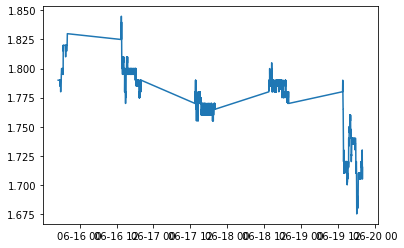

In [708]:
stock = yf.download('VEON',start ='2020-06-16',interval = '1m')
plt.plot(stock.Close)
stock = normalize(stock.Close.rolling(3).mean())

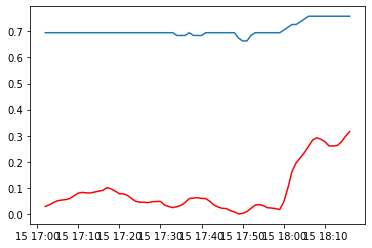

In [709]:
N = 77
plt.plot(stock[:N] )
plt.plot(sp_norm[:N],'red')
# plt.plot(sp.Low[-77:])

In [710]:
def deltas(x, n_step_back = 5):
    def sum_delts(x,k, n_step):
        s = 0
        for i in range(n_step):
            s += (x[k-i] - x[k-i-1])
        return s
    n = len(x)
    out = np.zeros(n)
    for i in range(n):
        if i > n-2:
            break
        out[i] = sum_delts(x,i,n_step_back)
    return out

In [718]:
print(len(sp_norm))
sp_delta =  deltas(sp_norm.values, 5)
stock_delta = deltas(stock.values, 5)

1729


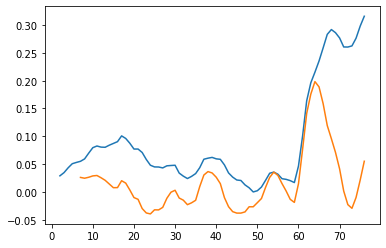

In [730]:
N = 77
plt.plot(sp_norm.values[:N])
plt.plot(sp_delta[:N])

No handles with labels found to put in legend.


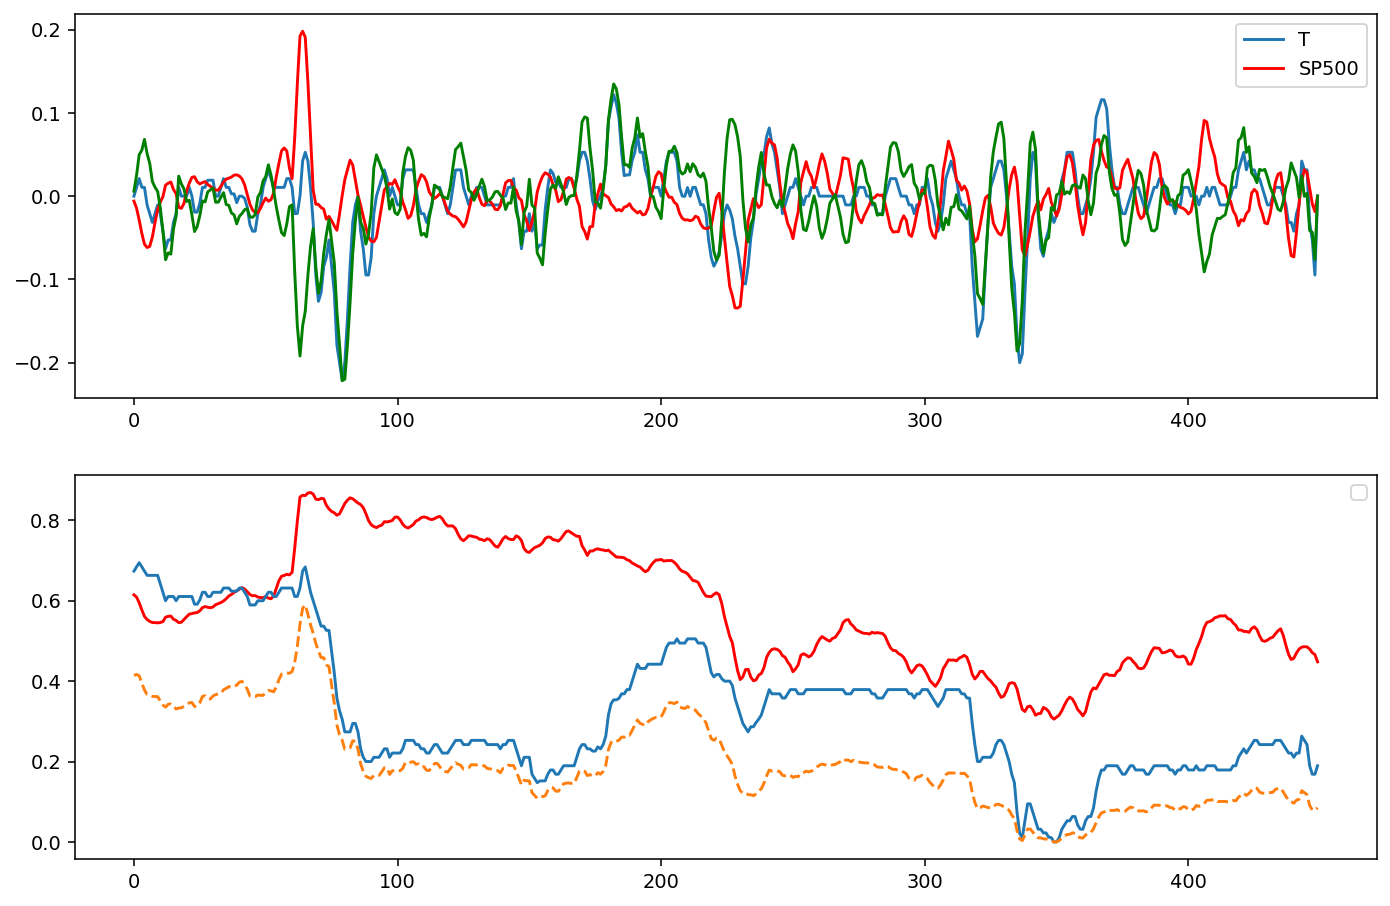

In [731]:
fig,ax = plt.subplots(2,1,figsize=(12,8), dpi = 140)

N = 450
# plt.plot(stock.values[:N])
ax[0].plot(stock_delta[-N:],   label='T')
ax[0].plot(sp_delta[-N:],'red', label='SP500')
ax[0].legend()
ax[0].plot(stock_delta[-N:] - sp_delta[-N:],'green')


ax[1].plot(sp_norm[-N:].values,'red')
ax[1].plot(stock[-N:].values)
ax[1].plot(stock[-N:].values*sp_norm[-N:].values,'--')

ax[1].legend()


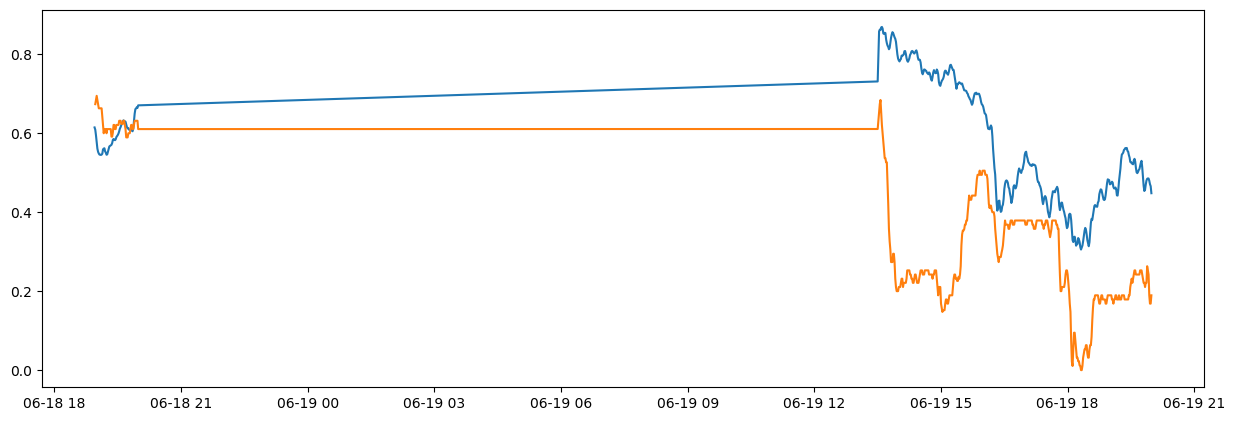

In [729]:
fig = plt.figure(figsize=(15,5), dpi = 100)
plt.plot(sp_norm[-N:])
plt.plot(stock[-N:])